# Hello Keras

En este caso, iniciaremos con un ejemplo muy sencillo para mostrar el enfoque de keras.

Se puede entender una red neuronal como una forma de relacionar varios numeros. Por ejemplo, si tuviéramos que definir una función, las 'reglas' son conocidas:

```
float hw_function(float x){
    float y = (2 * x) - 1;
    return y;
}
```

La pregunta es, cómo logramos entrenar una red neuronal para realizar una tarea equivalente? Usando datos!. Si alimentamos una red con un conjunto de valores de X y Y, la misma debería ser capaz de "aprender" la relación entre tales valores.

## Módulos necesarios
Importamos Tensorflow y numpy para ayudarnos a representar nuestros datos de manera sencilla.

Usaremos keras para representar nuestro modelo como una secuencia de capas.

In [9]:
import tensorflow as tf
import numpy as np
import keras

## Definir y compilar la red neuronal

Vamos a crear la red neuronal más simple posible. Posee 1 capa, la capa tiene 1 neurona y los valores de entrada tienen dimensión 1.

In [14]:
model = tf.keras.Sequential(
    [
        keras.layers.Dense(units=1, input_shape=[1])
    ])

Para compilar nuestra red, debemos especificar 2 funciones, una función de costo o pérdida y un optimizador.

Es posible definir estas funciones de manera manual, pero Keras encapsula estas funcionalidades para nosotros con algoritmos y valores usados en la industria y considerados "estado del arte".

En este ejemplo, nosotros sabemos que la relación entre los números es $y = 2x - 1$ 

Cuando la red está intentando "aprender" dicha relación, realiza predicciones como intentando adivinar. La **función de costo** compara las predicciones contra las respuestas correctas y mide qué tan buena o cercana fue la predicción al valor correcto.

Luego, se usa el **optimizador** para intentar disminuir el valor del costo. El optimizador intentará acercarse a la respuesta correcta en base al valor del costo.

Este proceso se repetirá por un número de **épocas** determinadas. En este ejemplo, se usará el error cuadrático medio o MSE para el costo y el descenso de gradiente estocástico o SGD para el optimizador.

In [15]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Obteniendo los datos

Seguidamente, obtendremos algo de datos. En este caso, 6 valores de X y 6 valores de Y. Se puede observar que la relación entre las variables está dada por $y = 2x - 1$, así que cuando $x = -1$, $y = -3$.

En este caso, usaremos arrays de numpy para definir estos arreglos de datos.

In [16]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

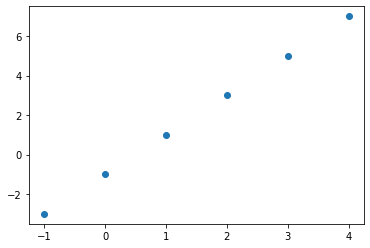

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(xs, ys)

# Entrenando la red neuronal

El proceso de entrenamiento es donde la red "aprende" la relación entre X y Y. En keras, una vez definido y compilado el modelo se usa el método **model.fit** para realizar dicho entrenamiento.

En este entrenamiento se implementa el bucle mencionado anteriormente: predicción -> costo -> optimizador

Este bucle se repetirá por el número de épocas especificado.


In [27]:
model.fit(xs, ys, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 3ms/step - loss: 1.0943e-04
Epoch 2/1200
1/1 [==============================] - 0s 911us/step - loss: 1.0719e-04
Epoch 3/1200
1/1 [==============================] - 0s 1ms/step - loss: 1.0498e-04
Epoch 4/1200
1/1 [==============================] - 0s 2ms/step - loss: 1.0283e-04
Epoch 5/1200
1/1 [==============================] - 0s 1ms/step - loss: 1.0072e-04
Epoch 6/1200
1/1 [==============================] - 0s 1ms/step - loss: 9.8648e-05
Epoch 7/1200
1/1 [==============================] - 0s 1ms/step - loss: 9.6621e-05
Epoch 8/1200
1/1 [==============================] - 0s 947us/step - loss: 9.4636e-05
Epoch 9/1200
1/1 [==============================] - 0s 1ms/step - loss: 9.2692e-05
Epoch 10/1200
1/1 [==============================] - 0s 969us/step - loss: 9.0789e-05
Epoch 11/1200
1/1 [==============================] - 0s 2ms/step - loss: 8.8924e-05
Epoch 12/1200
1/1 [==============================] - 0s 1ms/step - loss: 8.7096

Perfecto! ya tenemos un modelo entrenado para aprender la relación entre X y Y. Ahora podemos usar **model.predict** para realizar predicciones en valores nunca vistos de X. por ejemplo, 10:

In [28]:
print(model.predict([10.0]))

[[18.999987]]


In [29]:
model.evaluate(xs, ys)

1/1 [==============================] - 0s 11ms/step - loss: 1.0604e-11


1.0603666382447141e-11